In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


import os
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore


import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity

from pandas import read_csv, DataFrame
import pandas as pd
import sys

In [172]:
# Get the CSV data here and print head
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [173]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [130]:
df.Credit_History

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [132]:
df.shape

(614, 13)

In [133]:
def explore_object_type(df,feature_name):
    if df[feature_name].dtype == 'object':
        print(df[feature_name].value_counts())

In [134]:
for featureName in df:
    if df[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(df, str(featureName))


"Loan_ID's" Values with count are :
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


In [135]:
df = df.drop(['Loan_ID'], axis=1)

In [136]:
df=df.fillna({"Gender":df["Gender"].mode()[0]})
df=df.fillna({"Married":df["Married"].mode()[0]})
df=df.fillna({"Dependents":df["Dependents"].mode()[0]})
df=df.fillna({"Self_Employed":df["Self_Employed"].mode()[0]})
df=df.fillna({"Credit_History":df["Credit_History"].mode()[0]})

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [138]:
#Before using Iterative Imputer, we need to enable it using below code
from sklearn.experimental import enable_iterative_imputer
#import Iterative Imputer
from sklearn.impute import IterativeImputer

In [139]:
#using interative imputer for  LoanAmount & Loan_Amount_Term 
iter_impute=IterativeImputer()
ite_imp1 = pd.DataFrame(iter_impute.fit_transform(df[['LoanAmount', 'Loan_Amount_Term']]), columns=['LoanAmount', 'Loan_Amount_Term'])
ite_imp1

,LoanAmount,Loan_Amount_Term
0,146.496476,360.0
1,128.000000,360.0
2,66.000000,360.0
3,120.000000,360.0
4,141.000000,360.0
...,...,...
609,71.000000,360.0
610,40.000000,180.0
611,253.000000,360.0
612,187.000000,360.0


In [140]:
df['LoanAmount']= ite_imp1['LoanAmount']
df['Loan_Amount_Term']= ite_imp1['Loan_Amount_Term']

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [142]:
#making loan sgtatus yes and No into numerical data
df['Loan_Status']=df['Loan_Status'].map({'N':0, 'Y':1}).astype(int)

1    422
0    192
Name: Loan_Status, dtype: int64


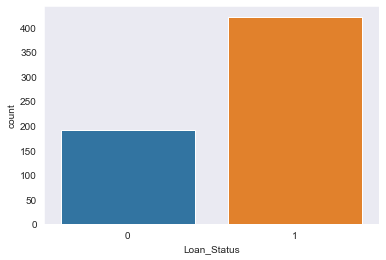

In [143]:
import seaborn as sns #checking for null
Loan_Status=sns.countplot(x="Loan_Status", data=df)
print(df["Loan_Status"].value_counts())

In [144]:
#Thus we can see that the majority is 'YES', which is equal to 1. Let us move futher to check accuracy of this data

In [145]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.496476,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


1.0    525
0.0     89
Name: Credit_History, dtype: int64


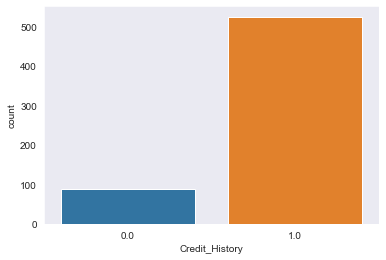

In [146]:
import seaborn as sns #checking for null
Property_Area=sns.countplot(x="Credit_History", data=df)
print(df["Credit_History"].value_counts())

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


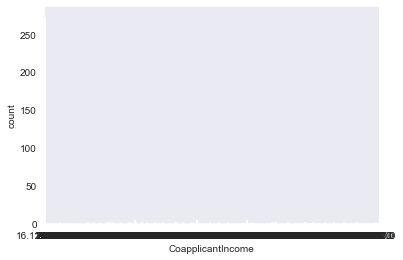

In [147]:
import seaborn as sns #checking for null
Property_Area=sns.countplot(x="CoapplicantIncome", data=df)
print(df["CoapplicantIncome"].value_counts())

In [148]:
df=df.fillna({"CoapplicantIncome":df["CoapplicantIncome"].mean()})

In [149]:
df['CoapplicantIncome']=df['CoapplicantIncome'].replace(0,df['CoapplicantIncome'].mean())

1621.245798    273
2500.000000      5
2083.000000      5
1666.000000      5
2250.000000      3
              ... 
2791.000000      1
1010.000000      1
1695.000000      1
2598.000000      1
240.000000       1
Name: CoapplicantIncome, Length: 287, dtype: int64


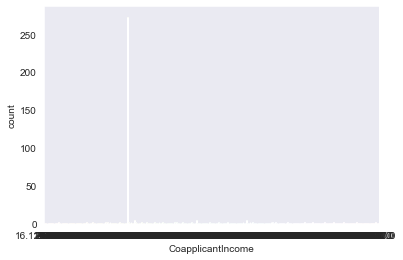

In [150]:
import seaborn as sns #checking for null
CoapplicantIncome=sns.countplot(x="CoapplicantIncome", data=df)
print(df["CoapplicantIncome"].value_counts())

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

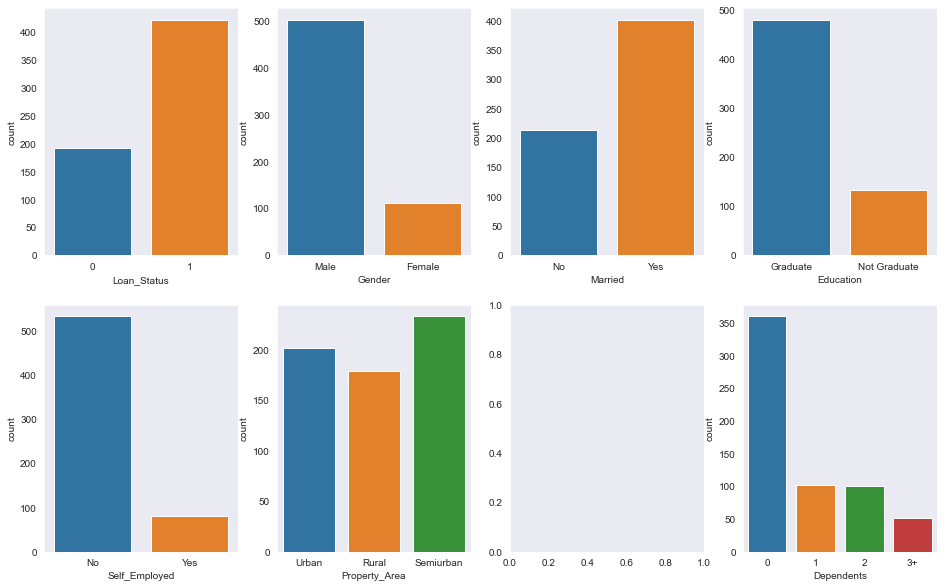

In [151]:
fig,ax=plt.subplots(2,4, figsize=(16,10))
sns.countplot('Gender', data=df, ax=ax[0][1])
sns.countplot('Married', data=df, ax=ax[0][2])
sns.countplot('Dependents', data=df, ax=ax[1][3])
sns.countplot('Education', data=df, ax=ax[0][3])
sns.countplot('Self_Employed', data=df, ax=ax[1][0])
sns.countplot('Property_Area', data=df, ax=ax[1][1])
sns.countplot('Loan_Status', data=df, ax=ax[0][0])

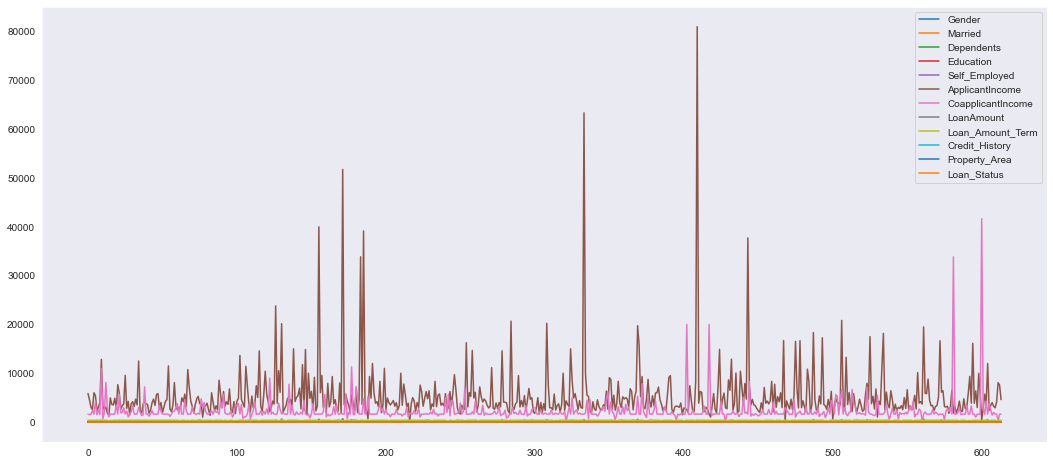

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set_style('dark')
df.plot(figsize=(18, 8))

plt.show()

In [154]:
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()

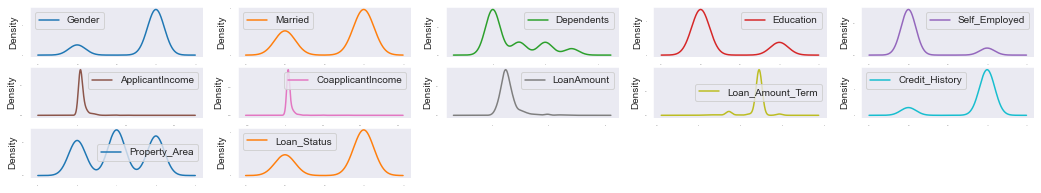

In [155]:
df.plot(kind='density', subplots=True, layout=(11, 5), sharex=False, legend=True, fontsize=1, figsize=(18,12))
plt.show()

In [156]:
#as you can see some dat is skewed, towards right or left, this needs to be treated

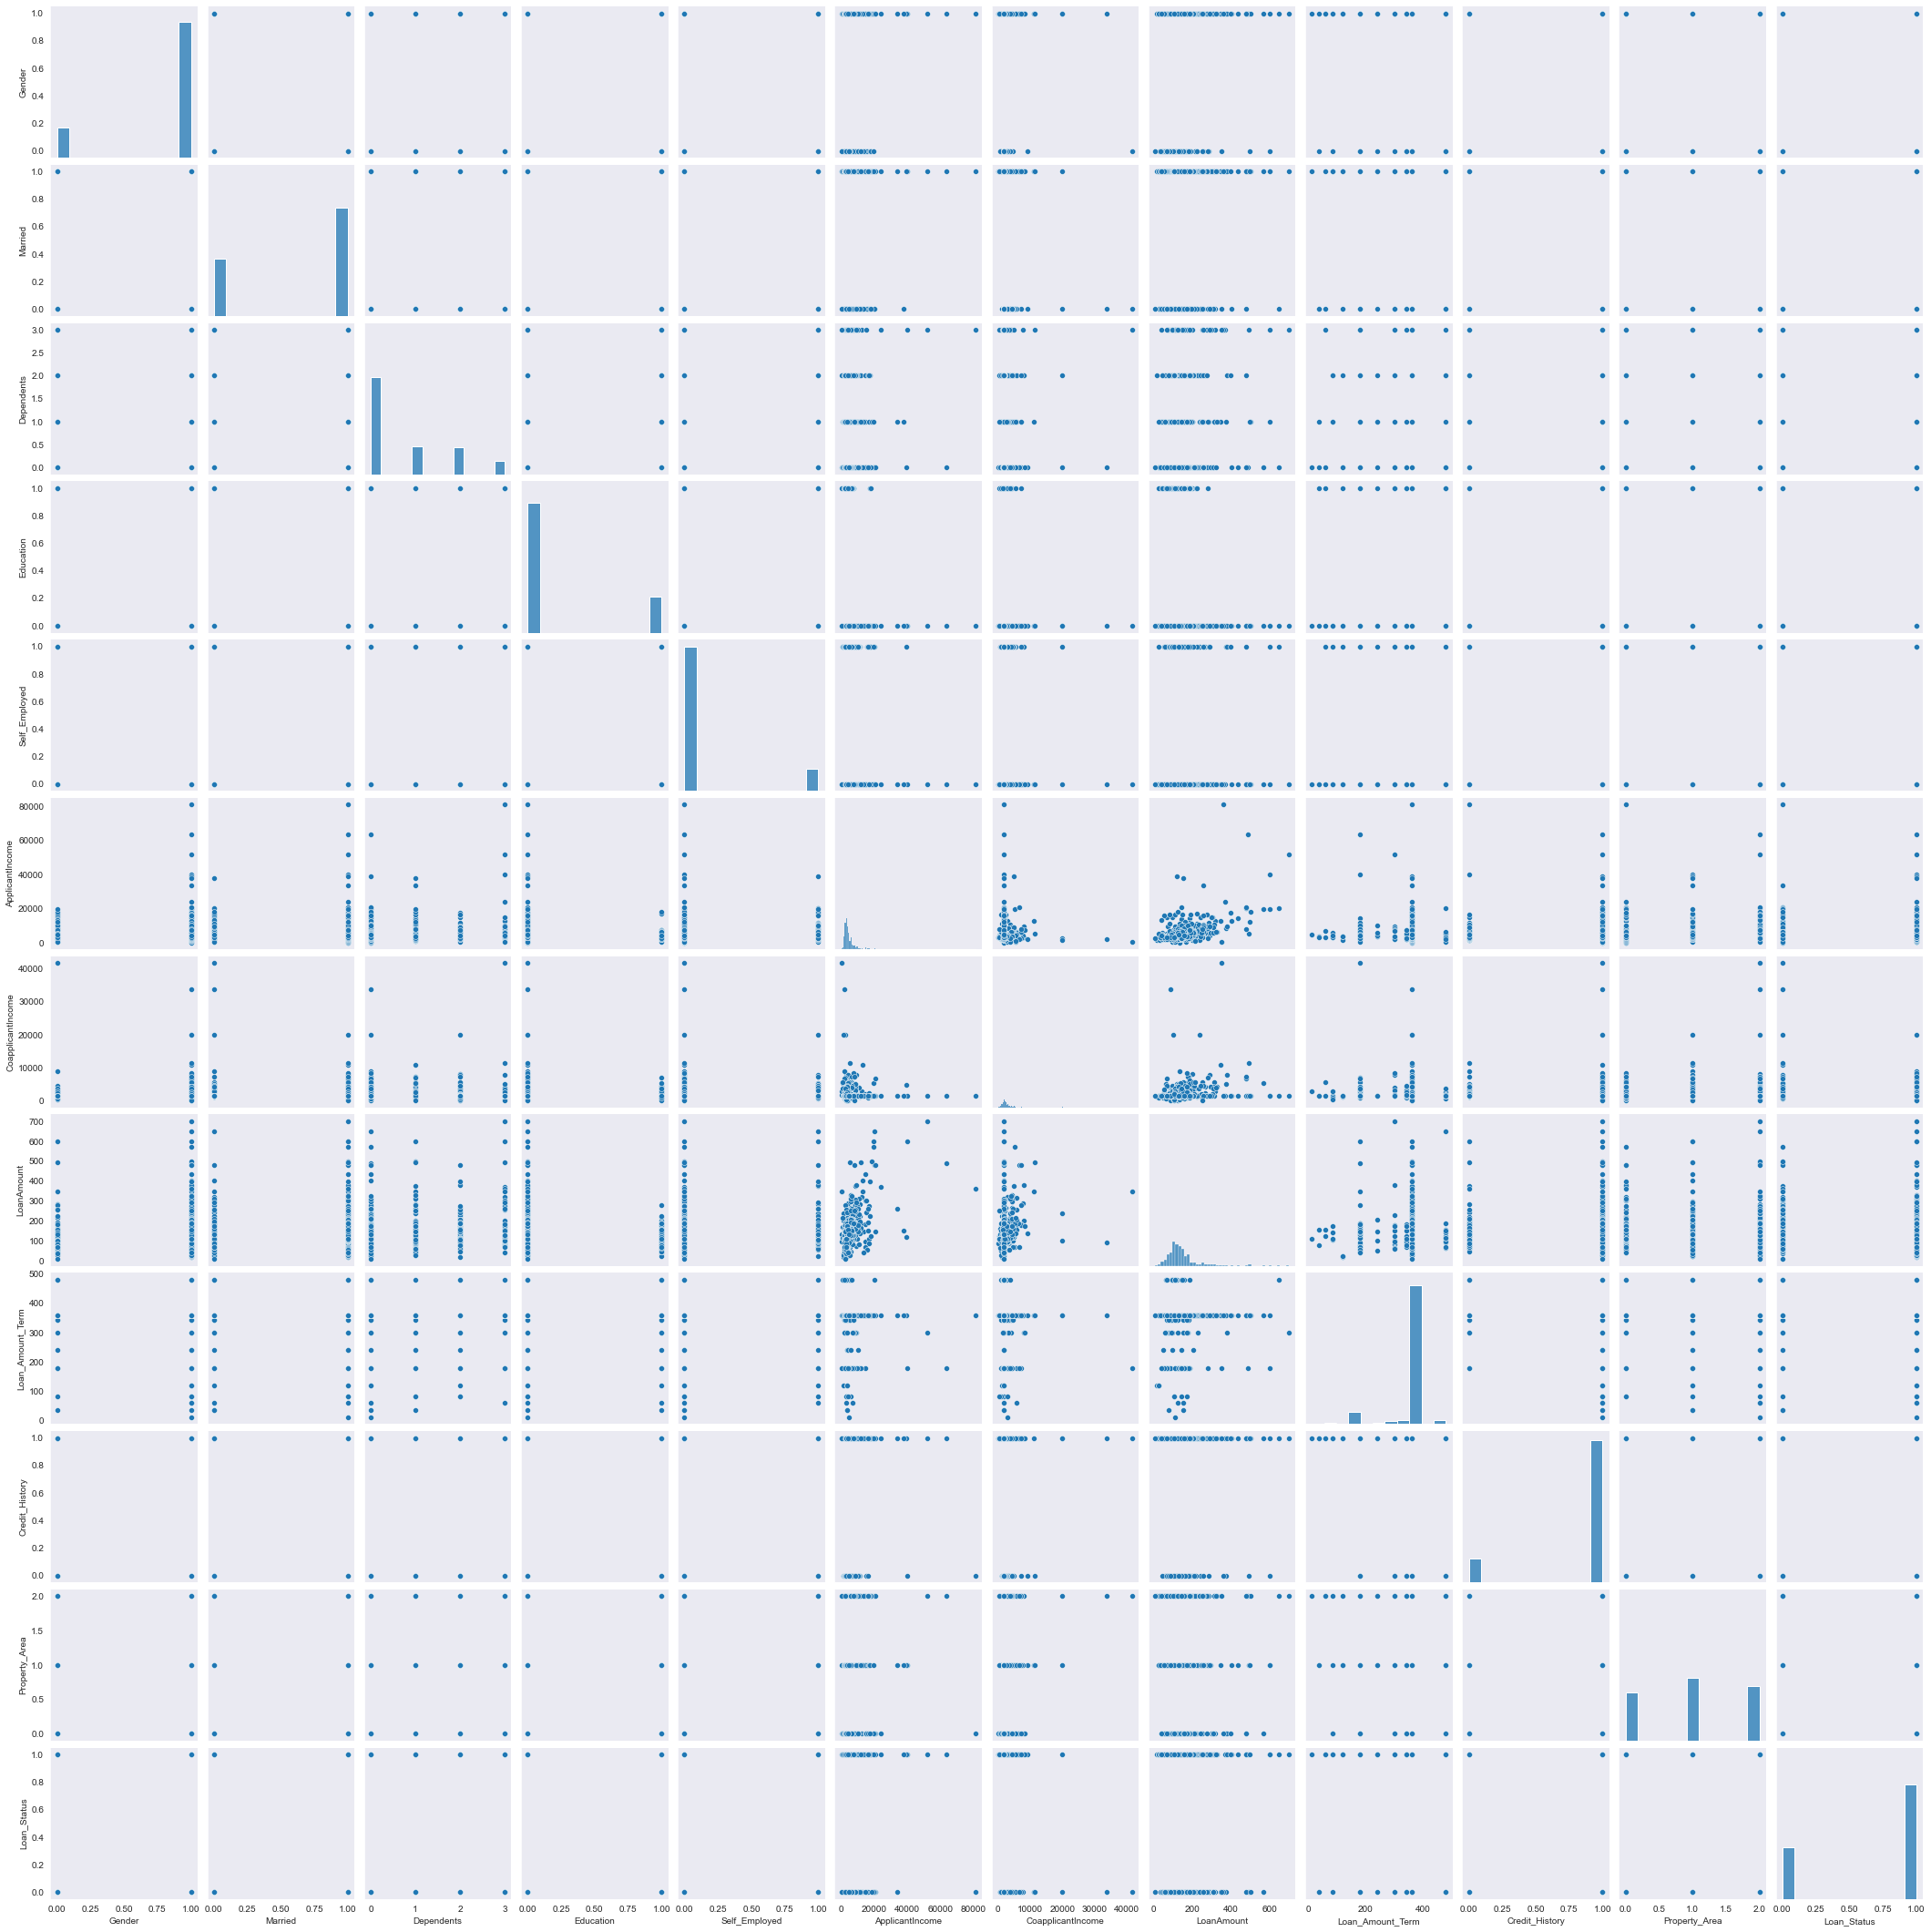

In [157]:
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.savefig('pairplot2.png')
plt.show()

<AxesSubplot:>

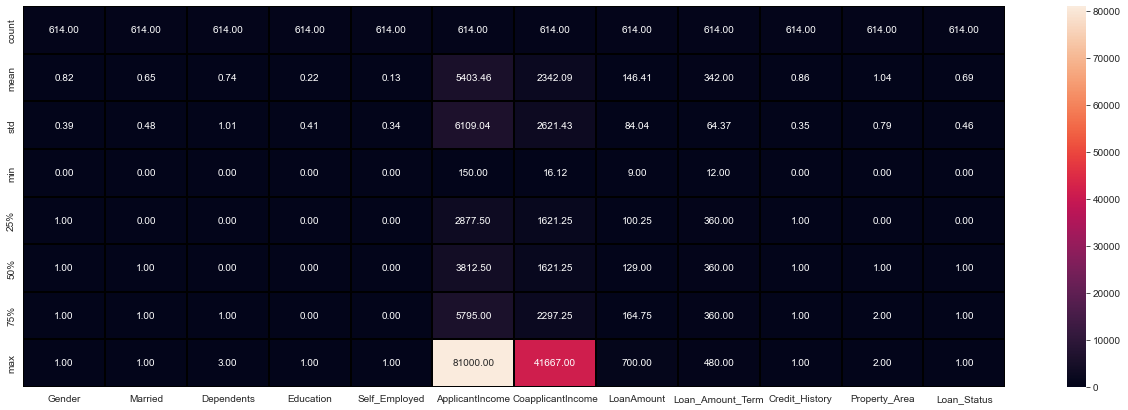

In [158]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [159]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.024156,0.107942,-0.073549,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,-0.017504,0.147112,-0.100852,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.031776,0.163088,-0.101042,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.088032,-0.167046,-0.077271,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,0.013265,0.115278,-0.033964,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.050734,0.565624,-0.045231,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.024156,-0.017504,0.031776,-0.088032,0.013265,-0.050734,1.000000,0.205381,-0.073195,0.008339,0.028111,-0.089189
LoanAmount,0.107942,0.147112,0.163088,-0.167046,0.115278,0.565624,0.205381,1.000000,0.038932,-0.001452,-0.044807,-0.036389
Loan_Amount_Term,-0.073549,-0.100852,-0.101042,-0.077271,-0.033964,-0.045231,-0.073195,0.038932,1.000000,0.000476,-0.077657,-0.020956
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.008339,-0.001452,0.000476,1.000000,0.001963,0.540556


<AxesSubplot:>

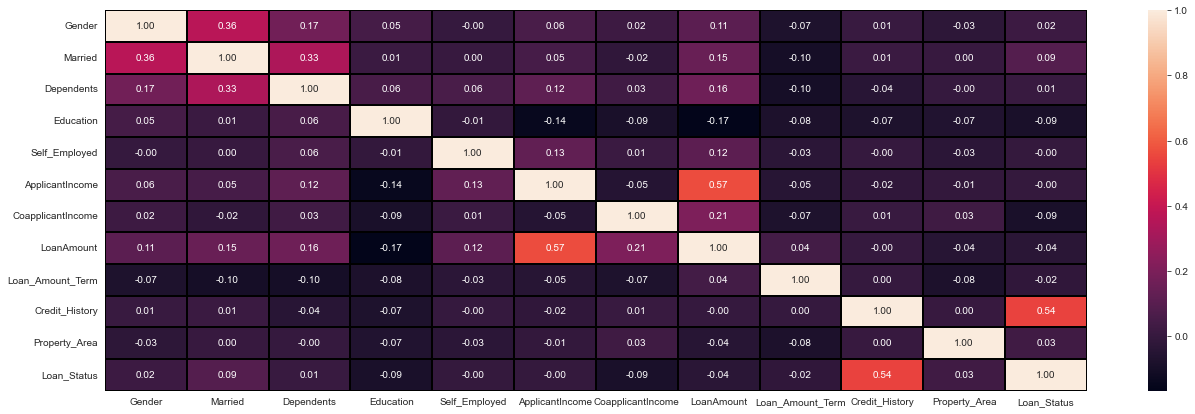

In [160]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [161]:
#there seems to be a high relation between loan status and credit history as well as loan amount and application income

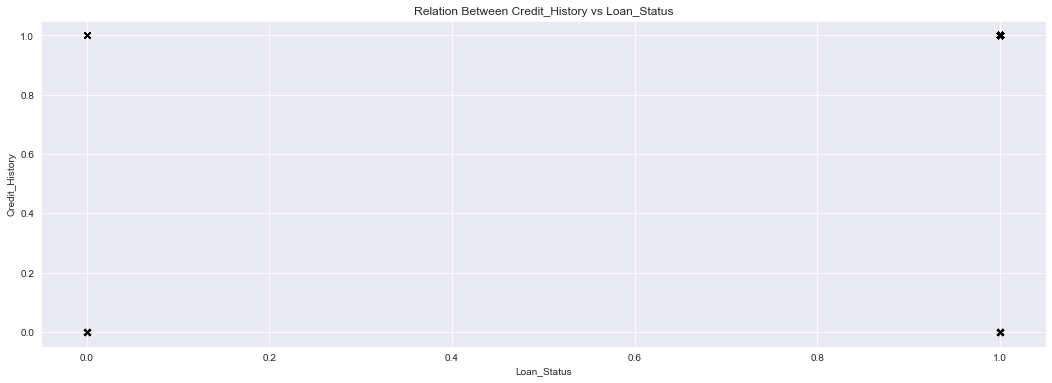

In [162]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Credit_History vs Loan_Status")

plt.grid()
plt.scatter(df['Credit_History'] , df['Loan_Status'], c='k', marker='x')
plt.xlabel("Loan_Status")
plt.ylabel("Credit_History")
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

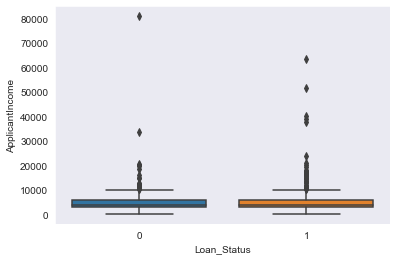

In [165]:
import seaborn as sns
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)

<AxesSubplot:xlabel='count', ylabel='Married'>

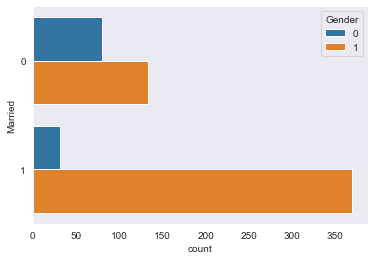

In [169]:
sns.countplot(y='Married', hue='Gender', data=df)

<AxesSubplot:xlabel='count', ylabel='Married'>

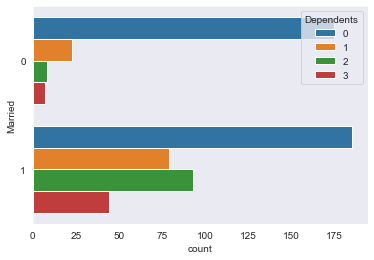

In [170]:
sns.countplot(y='Married', hue='Dependents', data=df)

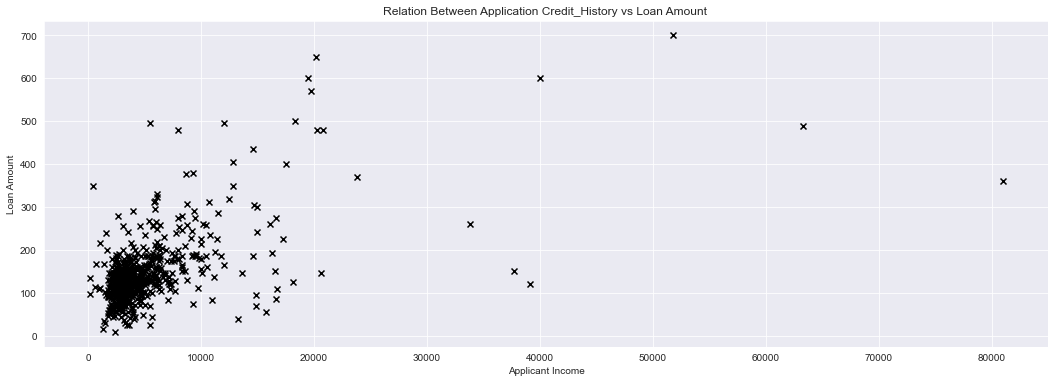

In [38]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Application Credit_History vs Loan Amount ")

plt.grid()
plt.scatter(df['ApplicantIncome'] , df['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

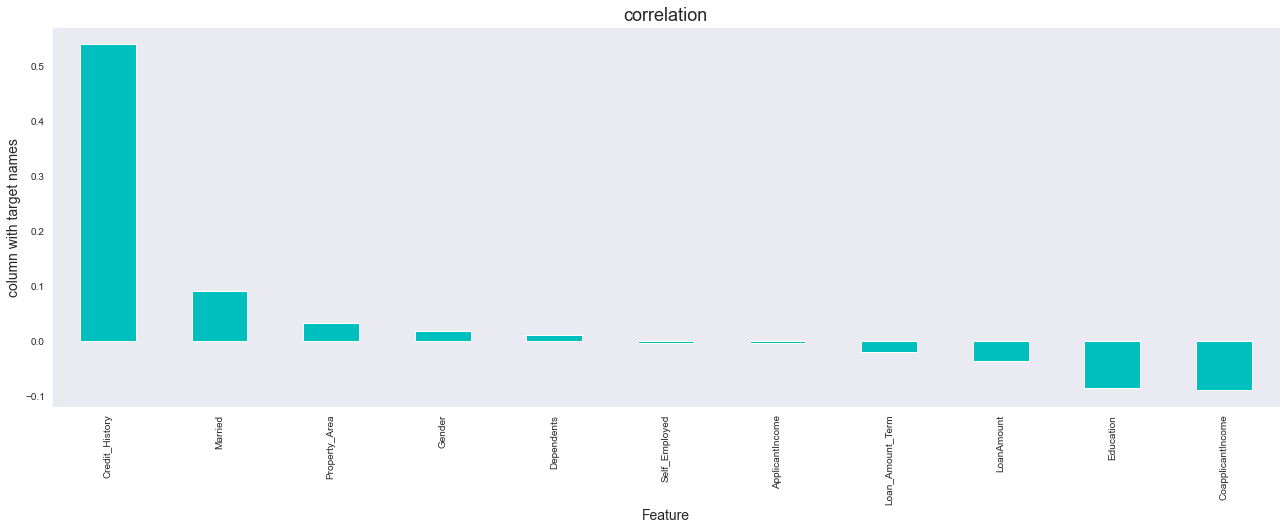

In [103]:
#CORELATION WITH LOAN STATUS
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

In [40]:
#High corelation between credit history and loan status

In [41]:
df.skew().sort_values(ascending=False)

CoapplicantIncome    9.677699
ApplicantIncome      6.539513
LoanAmount           2.726624
Self_Employed        2.159796
Education            1.367622
Dependents           1.015551
Property_Area       -0.066196
Married             -0.644850
Loan_Status         -0.809998
Gender              -1.648795
Credit_History      -2.021971
Loan_Amount_Term    -2.389552
dtype: float64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [43]:
#there is shewness for CoapplicantIncome, ApplicantIncome, LoanAmount, Self_Employed, Credit_History, Loan_Amount_Term, Gender, Education

In [44]:
# Partioning the data
x = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

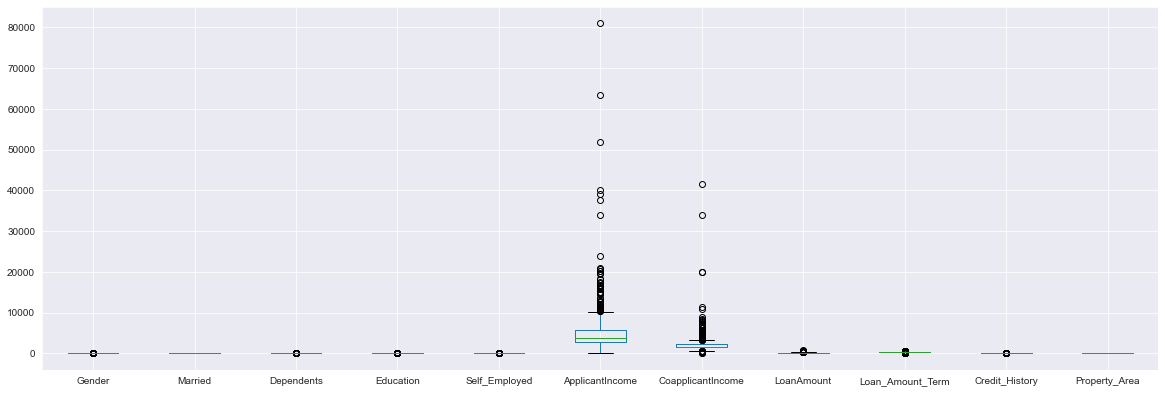

In [45]:
#Plotting boxplots for 13 columns
x.iloc[:,0:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [46]:
#there are outliers for applicant income and co-applicant income

In [47]:
from sklearn.preprocessing import power_transform
X_new=power_transform(x)

In [48]:
X_new

array([[ 4.72342640e-01, -1.37208932e+00, -8.27104306e-01, ...,
         1.85968984e-01,  4.11732692e-01,  1.19356680e+00],
       [ 4.72342640e-01,  7.28815525e-01,  8.54259122e-01, ...,
         1.85968984e-01,  4.11732692e-01, -1.35000343e+00],
       [ 4.72342640e-01,  7.28815525e-01, -8.27104306e-01, ...,
         1.85968984e-01,  4.11732692e-01,  1.19356680e+00],
       ...,
       [ 4.72342640e-01,  7.28815525e-01,  8.54259122e-01, ...,
         1.85968984e-01,  4.11732692e-01,  1.19356680e+00],
       [ 4.72342640e-01,  7.28815525e-01,  1.31670248e+00, ...,
         1.85968984e-01,  4.11732692e-01,  1.19356680e+00],
       [-2.11710719e+00, -1.37208932e+00, -8.27104306e-01, ...,
         1.85968984e-01, -2.42876026e+00,  2.36103342e-03]])

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Scaled_X=sc.fit_transform(X_new)
Scaled_X

array([[ 4.72342640e-01, -1.37208932e+00, -8.27104306e-01, ...,
         1.85968984e-01,  4.11732692e-01,  1.19356680e+00],
       [ 4.72342640e-01,  7.28815525e-01,  8.54259122e-01, ...,
         1.85968984e-01,  4.11732692e-01, -1.35000343e+00],
       [ 4.72342640e-01,  7.28815525e-01, -8.27104306e-01, ...,
         1.85968984e-01,  4.11732692e-01,  1.19356680e+00],
       ...,
       [ 4.72342640e-01,  7.28815525e-01,  8.54259122e-01, ...,
         1.85968984e-01,  4.11732692e-01,  1.19356680e+00],
       [ 4.72342640e-01,  7.28815525e-01,  1.31670248e+00, ...,
         1.85968984e-01,  4.11732692e-01,  1.19356680e+00],
       [-2.11710719e+00, -1.37208932e+00, -8.27104306e-01, ...,
         1.85968984e-01, -2.42876026e+00,  2.36103342e-03]])

In [50]:
pd.DataFrame(Scaled_X, columns=x.columns).skew().sort_values(ascending=False) #skewness is from -2 to 2

Self_Employed        2.159796
Education            1.367622
Dependents           0.441404
Loan_Amount_Term     0.389765
LoanAmount           0.024373
CoapplicantIncome    0.024058
ApplicantIncome     -0.092946
Property_Area       -0.158267
Married             -0.644850
Gender              -1.648795
Credit_History      -2.021971
dtype: float64

In [51]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
dtypes: float64(4), int32(6), int64(1)
memory usage: 38.5 KB


In [53]:
X=pd.DataFrame(Scaled_X, columns=x.columns)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
lr=LinearRegression()


In [55]:
from sklearn.metrics import r2_score
for i in range(0,400):
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(X_train,y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train, pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.3082280823170197
At random state 0,the testing accuracy is:- 0.2919637127118744


At random state 1,the training accuracy is:- 0.327549075612505
At random state 1,the testing accuracy is:- 0.24556568798049916


At random state 2,the training accuracy is:- 0.3423665077873237
At random state 2,the testing accuracy is:- 0.19925668144907027


At random state 3,the training accuracy is:- 0.3190019751213843
At random state 3,the testing accuracy is:- 0.2011529980688601


At random state 4,the training accuracy is:- 0.33024370299717676
At random state 4,the testing accuracy is:- 0.23295102066144535


At random state 5,the training accuracy is:- 0.31628749363626996
At random state 5,the testing accuracy is:- 0.2751263831255726


At random state 6,the training accuracy is:- 0.3106106961814077
At random state 6,the testing accuracy is:- 0.299867434467467


At random state 7,the training accuracy is:- 0.30304972831635557
At random state 7,the testing

At random state 64,the training accuracy is:- 0.3044714741728981
At random state 64,the testing accuracy is:- 0.3108885143369541


At random state 65,the training accuracy is:- 0.3376476864601853
At random state 65,the testing accuracy is:- 0.19775318592935964


At random state 66,the training accuracy is:- 0.3086301533836022
At random state 66,the testing accuracy is:- 0.29045550265625


At random state 67,the training accuracy is:- 0.3054401364483019
At random state 67,the testing accuracy is:- 0.3030040873661488


At random state 68,the training accuracy is:- 0.3360157150458172
At random state 68,the testing accuracy is:- 0.20959693090857456


At random state 69,the training accuracy is:- 0.2733780107949484
At random state 69,the testing accuracy is:- 0.40008686724601106


At random state 70,the training accuracy is:- 0.3178588186886996
At random state 70,the testing accuracy is:- 0.2754044959383516


At random state 71,the training accuracy is:- 0.36061846803178166
At random state 

At random state 137,the training accuracy is:- 0.3439184292622688
At random state 137,the testing accuracy is:- 0.16698143816024769


At random state 138,the training accuracy is:- 0.32023761663924666
At random state 138,the testing accuracy is:- 0.2523928936612009


At random state 139,the training accuracy is:- 0.28600746620247
At random state 139,the testing accuracy is:- 0.3603645748112063


At random state 140,the training accuracy is:- 0.3083087796673494
At random state 140,the testing accuracy is:- 0.28357267666155994


At random state 141,the training accuracy is:- 0.31640891270905325
At random state 141,the testing accuracy is:- 0.2644822343461153


At random state 142,the training accuracy is:- 0.3055010340651939
At random state 142,the testing accuracy is:- 0.30637550993417795


At random state 143,the training accuracy is:- 0.33659071975825716
At random state 143,the testing accuracy is:- 0.18933735096487725


At random state 144,the training accuracy is:- 0.310060062040767

At random state 213,the training accuracy is:- 0.32108075776511513
At random state 213,the testing accuracy is:- 0.2537441927623423


At random state 214,the training accuracy is:- 0.3240774300304785
At random state 214,the testing accuracy is:- 0.23603173553008316


At random state 215,the training accuracy is:- 0.2898511334843227
At random state 215,the testing accuracy is:- 0.3517061506814384


At random state 216,the training accuracy is:- 0.30932505814505906
At random state 216,the testing accuracy is:- 0.28300163927137045


At random state 217,the training accuracy is:- 0.3083536201698105
At random state 217,the testing accuracy is:- 0.29801898770473934


At random state 218,the training accuracy is:- 0.281053061759149
At random state 218,the testing accuracy is:- 0.3560787434738083


At random state 219,the training accuracy is:- 0.2765920666710253
At random state 219,the testing accuracy is:- 0.390953332800856


At random state 220,the training accuracy is:- 0.34916041436446577

At random state 286,the training accuracy is:- 0.3291241783969031
At random state 286,the testing accuracy is:- 0.24986794979689608


At random state 287,the training accuracy is:- 0.3357212291606406
At random state 287,the testing accuracy is:- 0.218408825969999


At random state 288,the training accuracy is:- 0.32743426364432504
At random state 288,the testing accuracy is:- 0.2408204504565995


At random state 289,the training accuracy is:- 0.2935648206980267
At random state 289,the testing accuracy is:- 0.34944018577768376


At random state 290,the training accuracy is:- 0.3179749252188012
At random state 290,the testing accuracy is:- 0.24682355004834255


At random state 291,the training accuracy is:- 0.27354037777705675
At random state 291,the testing accuracy is:- 0.368477777693592


At random state 292,the training accuracy is:- 0.29085544372216776
At random state 292,the testing accuracy is:- 0.33787466593265436


At random state 293,the training accuracy is:- 0.326360765610412

At random state 350,the training accuracy is:- 0.3198914938001487
At random state 350,the testing accuracy is:- 0.25511488455135856


At random state 351,the training accuracy is:- 0.29571090482443596
At random state 351,the testing accuracy is:- 0.3461549187392855


At random state 352,the training accuracy is:- 0.32174124414027416
At random state 352,the testing accuracy is:- 0.2421441741934779


At random state 353,the training accuracy is:- 0.3152926272336416
At random state 353,the testing accuracy is:- 0.231890345188149


At random state 354,the training accuracy is:- 0.2969396245973783
At random state 354,the testing accuracy is:- 0.3323442348122372


At random state 355,the training accuracy is:- 0.32851633458205964
At random state 355,the testing accuracy is:- 0.24331057428335756


At random state 356,the training accuracy is:- 0.3114876897492387
At random state 356,the testing accuracy is:- 0.27860148946048335


At random state 357,the training accuracy is:- 0.322989865923649

In [56]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.25, random_state=393)

In [57]:
lr=LogisticRegression() #Logistic Regression
knn=KNeighborsClassifier() #KNearest Neibour 
dt=DecisionTreeClassifier() # Deciesion Tree
rf=RandomForestClassifier() # Random Forest
adb=AdaBoostClassifier()    # Adaboost Classifier 
svm=SVC()              # support vactor classifier        
gdboost=GradientBoostingClassifier() #Gradient Boosting Classifier 
 
print("Model is created")

Model is created


In [58]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
print("Model is trained")

Model is trained


In [59]:
print("Lr classification score",lr.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("rf classification score",rf.score(X_train,y_train))
print("adb classification score",adb.score(X_train,y_train))
print("svm classification score",svm.score(X_train,y_train))
print("gdboost classification score",gdboost.score(X_train,y_train))

Lr classification score 0.7847826086956522
knn classification score 0.8043478260869565
dt classification score 1.0
rf classification score 1.0
adb classification score 0.8326086956521739
svm classification score 0.8065217391304348
gdboost classification score 0.8913043478260869


In [60]:
lr_yprad = lr.predict(X_test)
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
svm_yprad = svm.predict(X_test)
gdboost_yprad = gdboost.predict(X_test)

In [61]:
#classification report
lr_yprad = lr.predict(X_test)
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
svm_yprad = svm.predict(X_test)
gdboost_yprad = gdboost.predict(X_test)

In [62]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
#importing the ric and auc from sklearn and predect the x_test and 
#checking the roc_auc_score
print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,knn.predict(X_test)))
print(roc_auc_score(y_test,dt.predict(X_test)))
print(roc_auc_score(y_test,rf.predict(X_test)))
print(roc_auc_score(y_test,adb.predict(X_test)))
print(roc_auc_score(y_test,svm.predict(X_test)))
print(roc_auc_score(y_test,gdboost.predict(X_test)))

0.7954128440366972
0.7502548419979613
0.6853211009174311
0.7835881753312945
0.7946992864424056
0.7843017329255861
0.7751274209989806


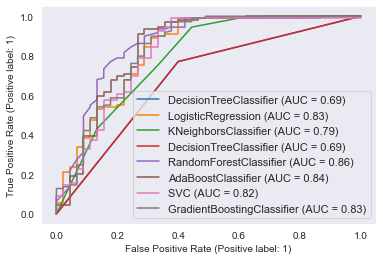

In [63]:
#lets find roc curve to check best fittted model
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

In [64]:
#CROSS VALIDATION
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True) #from above data
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [65]:
#CROSS VALIDATION MODEL FOR LINEAR REGRESSION
print("Mean of Cross validation score for Logistic regression model","=>",cross_val_score(lr,X,y,cv=6).mean())

Mean of Cross validation score for Logistic regression model => 0.8111079383209594


In [66]:
#RANDOM FOREST MODEL FOR CROSS VALIDATION
print("Mean of Cross validation score for Random Forest model","=>",cross_val_score(rf,X,y,cv=6).mean())

Mean of Cross validation score for Random Forest model => 0.7899454280093914


In [67]:
#Adaboost MODEL FOR CROSS VALIDATION
print("Mean of Cross validation score for Adaboost model","=>",cross_val_score(adb,X,y,cv=6).mean())

Mean of Cross validation score for Adaboost model => 0.786661590202424


In [68]:
adb.get_params().keys() 

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [69]:
params = {'n_estimators': [47,50,60,70], 'learning_rate': [0.1, 0.25,0.30,0.40]}

In [70]:
Adagridsearch = GridSearchCV(adb, param_grid = params , cv=6)
Adagridsearch.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.25, 0.3, 0.4],
                         'n_estimators': [47, 50, 60, 70]})

In [71]:
ADpred=Adagridsearch.predict(X_train)

In [72]:
Adagridsearch.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=47)

In [73]:
adb_clf=AdaBoostClassifier(
    n_estimators=70, learning_rate=0.3)
adb_clf.fit(X_train, y_train)
ADpred=adb_clf.predict(X_train)
adb_clf_report=pd.DataFrame(
    classification_report(y_train, ADpred, output_dict=True))
print("\n================Train Result======================")
print (f"Accuracy Score: {accuracy_score(y_train, ADpred)*100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT:\n{adb_clf_report}")
print("____________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, ADpred)} \n")

#***********************Test score******************************************
ADpred=adb_clf.predict(X_test)
clf_report = pd.DataFrame(
    classification_report(y_test, ADpred, output_dict=True))
print("\n=================Test Result ==========================")
print (f"Accuracy Score: {accuracy_score(y_test, ADpred)* 100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT: \n{clf_report}")
print("____________________________________________________")
print (f"Confusion Matrix: \n {confusion_matrix(y_test, ADpred)}\n")


================Train Result======================
Accuracy Score: 81.09%
____________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.916667    0.791237   0.81087    0.853952      0.831320
recall       0.448980    0.980831   0.81087    0.714905      0.810870
f1-score     0.602740    0.875892   0.81087    0.739316      0.788602
support    147.000000  313.000000   0.81087  460.000000    460.000000
____________________________________________________
Confusion Matrix: 
 [[ 66  81]
 [  6 307]] 


=================Test Result ==========================
Accuracy Score: 87.66%
____________________________________________________
CLASSIFICATION REPORT: 
                   0           1  accuracy   macro avg  weighted avg
precision   0.964286    0.857143  0.876623    0.910714      0.888451
recall      0.600000    0.990826  0.876623    0.795413      0.876623
f1-score    0.739726    0.919149  0.8

In [75]:
rf.get_params().keys() 

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
params = {'n_estimators': [47,50,60,70], 'criterion': ['gini', 'entropy'], = 'max_leaf_nodes': range(2,4), 'min_samples_split':range(3,10), 'max_depth': range(10,15))}

In [80]:
#TUNING WITH RANDOM FOREST
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [81]:
rf.get_params().keys() 

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [86]:
params = {'n_estimators': [47,50,60,70], 'criterion': ['gini', 'entropy'], 'max_leaf_nodes': range(2,4), 'min_samples_split':range(3,10), 'max_depth': range(10,15)}

In [98]:
rfgridsearch = GridSearchCV(rf, param_grid = params , cv=6, n_jobs = -1)
rfgridsearch.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_split': range(3, 10),
                         'n_estimators': [47, 50, 60, 70]})

In [99]:
rfgridsearch.best_estimator_

RandomForestClassifier(max_depth=10, max_leaf_nodes=3, min_samples_split=3,
                       n_estimators=50)

In [97]:
rf_clf=RandomForestClassifier(
    n_estimators=70, max_depth=10, max_leaf_nodes=3, min_samples_split=4, criterion='gini')
rf_clf.fit(X_train, y_train)
rfpred=rf_clf.predict(X_train)
rf_clf_report=pd.DataFrame(
    classification_report(y_train, rfpred, output_dict=True))
print("\n================Train Result======================")
print (f"Accuracy Score: {accuracy_score(y_train, rfpred)*100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("____________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, rfpred)} \n")

#***********************Test score******************************************
rfpred=rf_clf.predict(X_test)
clf_report = pd.DataFrame(
    classification_report(y_test, rfpred, output_dict=True))
print("\n=================Test Result ==========================")
print (f"Accuracy Score: {accuracy_score(y_test, rfpred)* 100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT: \n{clf_report}")
print("____________________________________________________")
print (f"Confusion Matrix: \n {confusion_matrix(y_test, rfpred)}\n")


================Train Result======================
Accuracy Score: 78.70%
____________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.901639    0.769424  0.786957    0.835531      0.811675
recall       0.374150    0.980831  0.786957    0.677490      0.786957
f1-score     0.528846    0.862360  0.786957    0.695603      0.755780
support    147.000000  313.000000  0.786957  460.000000    460.000000
____________________________________________________
Confusion Matrix: 
 [[ 55  92]
 [  6 307]] 


=================Test Result ==========================
Accuracy Score: 87.66%
____________________________________________________
CLASSIFICATION REPORT: 
                   0           1  accuracy   macro avg  weighted avg
precision   0.964286    0.857143  0.876623    0.910714      0.888451
recall      0.600000    0.990826  0.876623    0.795413      0.876623
f1-score    0.739726    0.919149  0.8

In [ ]:
#Thus you can see the accuracy is 87% for majority as as 'YES" to loan status 
#Applicants who are male and married tends to have more applicant income whereas applicant who are female and married have least applicant income

#Applicants who are male and graduated have more applicant income over the applicants who have not graduated.

#Applicants who are graduate and have credit history have more applicant income.

#Male applicants are more than female applicants.

#No of applicants who are married are more than no of applicants who are not married.

#Applicants with no dependents are maximum.

#Applicants with graduation are more than applicants whith no graduation.



In [100]:
adb_tuning=adb.fit(X_train,y_train)

In [101]:
import pickle as pkl
Loan_Prediction_Model='Loan_Prediction_Model.pickle'
pkl.dump(adb_tuning, open(Loan_Prediction_Model,'wb'))